# Monte Carlo Sampling Method

## Introduction 
- Trong thực tế, việc tính toán, xác định một phân bố xác suất rất khó khăn. Do đó, việc lấy mẫu có thể giúp cho việc ước tính gần đúng phân bố xác suất thực tế.   
- Monte Carlo là một lớp kĩ thuật cho việc lấy mẫu ngẫu nhiên từ phân bố xác suất. Có 3 lý do chính mà ta sử dụng kĩ thuật này để lấy mẫu từ phân bố xác suất : 
    - Ước tính mật độ : lấy mẫu nhằm ước tính gần đúng phân bố của hàm 
    - Tính gần đúng các giá trị như mean và variance của phân bố 
    - Tối ưu hàm : xác định mẫu để tối ưu cực đại cực tiểu của hàm 
- Kĩ thuật lấy mẫu một cách ngẫu nhiên phân bố và dựa theo luật số lớn với số lượng mẫu càng lớn thì ước tính chính xác càng cao


Ex : Ta cần hoàn thành 2 công việc, thời gian hoàn thành chúng được dự đoán bởi phân bố đều lần lượt là [1,5] và [2,6]. Xác suất để thời gian hoàn thành nhỏ hơn 9 tiếng. 

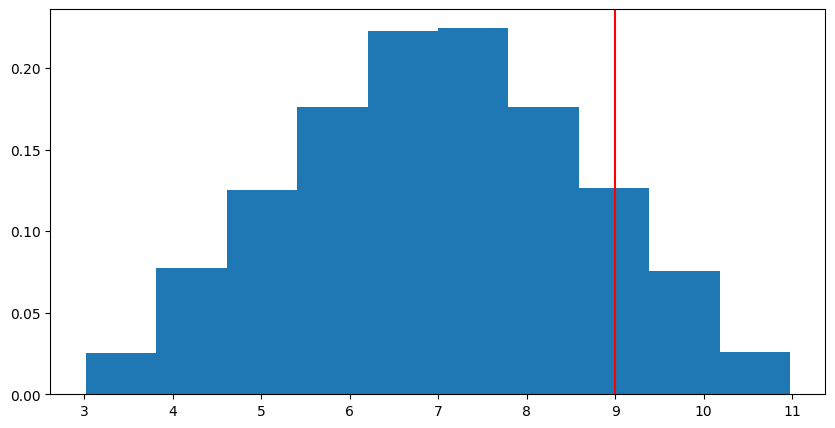

In [83]:
import numpy as np 
import matplotlib.pyplot as plt

size = 100000

A = np.random.uniform(1,5,size)
B = np.random.uniform(2,6,size)

dur = A + B 

plt.figure(figsize = (10, 5))
plt.hist(dur, density = True)
plt.axvline(9, color = 'r')
plt.show()

## Inverse CDF method for Discrete Variables


- Giả sử mô phỏng mặt xúc sắc 6 mặt với sample có chiều dài là 100. 

In [84]:
import pandas as pd
import numpy as np
from pandas import DataFrame
u= np.random.rand(100)
df = DataFrame(data=u,columns=['u'])
labels = [1,2,3,4,5,6]
df['v']=pd.cut(df.u,np.linspace(0,1,7),
 include_lowest=True,labels=labels)
df

,u,v
0,0.012122,1
1,0.849765,6
2,0.333482,3
3,0.715803,5
4,0.350496,3
...,...,...
95,0.878062,6
96,0.011290,1
97,0.453529,3
98,0.056679,1


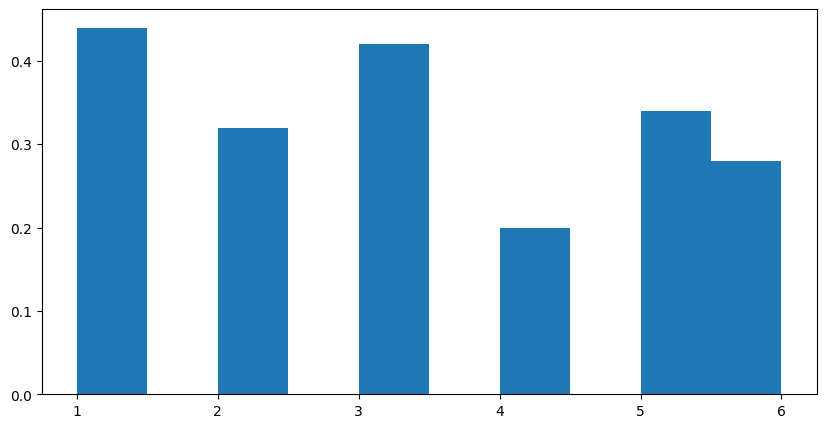

In [85]:
plt.figure(figsize = (10, 5))
plt.hist(df['v'], density= True)
plt.show()

=> Phương thức này gọi là đảo ngược CDF bởi vì ta cung cấp trước phân bố và tạo ra mẫu

## Inverse CDF Method for Continuous Variables 
- Để tìm hàm đảo ngược với một hàm CDF cho trước, ta tìm một hàm x theo y ngược biến lại so với hàm CDF. 
Với hàm CDF như sau : $ F(x) = 1 - e^{-\alpha x} $ khi đó hàm đảo ngược như sau : $ F^{-1}(u) = \frac 1 \alpha ln \frac 1 {1 - u} $

In [86]:
from numpy import array, log
import scipy.stats
alpha = 1. # distribution parameter
nsamp = 1000 # num of samples
# define uniform random variable
u=scipy.stats.uniform(0,1)
 # define inverse function
Finv=lambda u: 1/alpha*log(1/(1-u))
 # apply inverse function to samples
v = array(list(map(Finv,u.rvs(nsamp))))

((array([1.00069315, 1.0016833 , 1.00268512, 1.00368795, 1.00469178,
         1.00569662, 1.00670247, 1.00770934, 1.00871722, 1.00972611,
         1.01073603, 1.01174696, 1.01275892, 1.01377191, 1.01478592,
         1.01580096, 1.01681703, 1.01783414, 1.01885228, 1.01987145,
         1.02089167, 1.02191293, 1.02293524, 1.02395859, 1.02498299,
         1.02600844, 1.02703494, 1.02806249, 1.02909111, 1.03012078,
         1.03115151, 1.03218331, 1.03321617, 1.03425011, 1.03528511,
         1.03632118, 1.03735833, 1.03839655, 1.03943586, 1.04047624,
         1.04151771, 1.04256027, 1.04360391, 1.04464864, 1.04569447,
         1.04674139, 1.04778941, 1.04883852, 1.04988874, 1.05094006,
         1.05199249, 1.05304603, 1.05410068, 1.05515644, 1.05621332,
         1.05727132, 1.05833044, 1.05939068, 1.06045204, 1.06151454,
         1.06257816, 1.06364292, 1.06470881, 1.06577583, 1.066844  ,
         1.06791331, 1.06898377, 1.07005537, 1.07112812, 1.07220202,
         1.07327708, 1.0743533 , 1

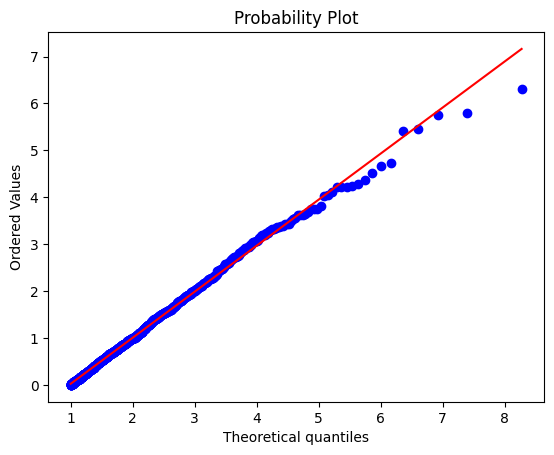

In [87]:
fig,ax= plt.subplots()
scipy.stats.probplot(v,(1,),dist='expon',plot=ax)

## Rejection Method
- Rejection method được dùng để xử lý tình huống việc chuyển đổi hàm CDF là không thể. Giả sử ta muốn lấy mấu một hàm f(x) trong khoảng $ x \rightarrow U(-3, 3) $ thông qua một hàm g(x)  

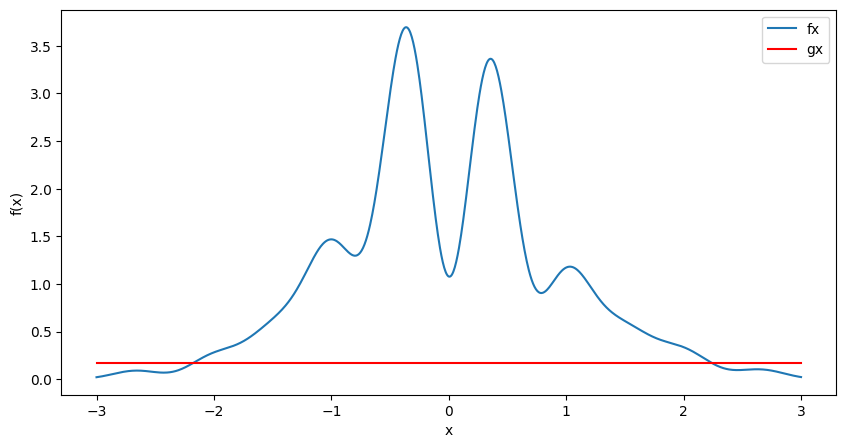

In [88]:
f = lambda x: np.exp(-x**2 / 2) * (np.sin(6 + x)**2 + 3 * np.cos(x)**2 * np.sin(4*x)**2 + 1)

# Vẽ đồ thị
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-3, 3, 1000), f(np.linspace(-3, 3, 1000)), label = "fx")
plt.plot([-3, 3], [1/6, 1/6], color='red', label = 'gx')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


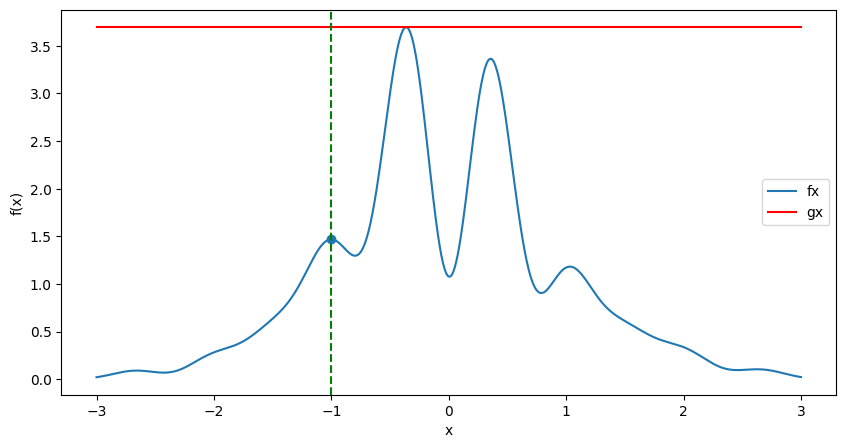

In [89]:
C = max(f(np.linspace(-3, 3, 1000)) /(1/6))
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-3, 3, 1000), f(np.linspace(-3, 3, 1000)), label = "fx")
plt.plot([-3, 3], [C *1/6, C* 1/6], color='red', label = 'gx')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axvline(-1, color = 'green', linestyle='dashed')
plt.scatter(-1, f(-1))
plt.legend()
plt.show()

- Các bước cho Reject Method : 
    - Xét khoảng lấy sample gx 
    - Lấy biến ngẫu nhiên u nằm trong khoảng 0 đến Cg(x) theo phân bố đều
    - Kiếm tra nếu $ u \leq f(x) $ true thì chấp nhận 

In [90]:
from scipy.stats  import uniform
N = 10000
X = np.random.rand(N)
pdf_values = C * uniform(-3, 6).pdf(X)
u = np.random.uniform(0, pdf_values)

# Accept samples based on weights and PDF comparison
accepted_indices = np.where(u <= f(X))
samples = X[accepted_indices]


print("Accpeted rate :"  + str( len(samples) / N))

Accpeted rate :0.5066


Efficiency is only 26.4%


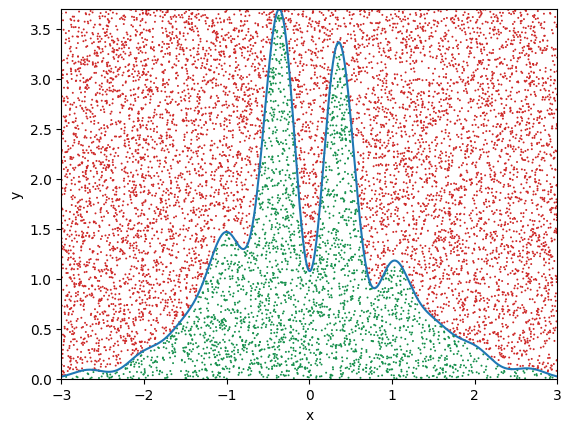

In [94]:
def batch_sample(func, num, xmin, xmax, ymax) : 
    x = np.random.uniform(low = xmin, high = xmax, size = num)
    y = np.random.uniform(low = 0, high = ymax, size = num)
    passed = (y < func(x)).astype(int)
    return x, y, passed

x,y, passed = batch_sample(f, N, -3, 3, C/6)

plt.plot(np.linspace(-3, 3, 1000), f(np.linspace(-3, 3, 1000)), label = "fx")
plt.scatter(x, y, c=passed, cmap="RdYlGn", vmin=-0.1, vmax=1.1, lw=0, s=2)
plt.xlabel("x"), plt.ylabel("y"), plt.xlim(-3, 3), plt.ylim(0, C/6)

print(f"Efficiency is only {passed.mean() * 100:0.1f}%")